In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mne
#%matplotlib inline
%matplotlib qt

In [2]:
raw = mne.io.read_raw_fif('../../data/AlphaTheta/sam-AlphaTheta/offline/fif/20200304-144100-raw.fif')

Opening raw data file ../../data/AlphaTheta/sam-AlphaTheta/offline/fif/20200304-144100-raw.fif...
Isotrak not found
    Range : 0 ... 38051 =      0.000 ...   126.837 secs
Ready.


In [3]:
raw.info

<Info | 19 non-empty fields
    bads : list | 0 items
    ch_names : list | TRIGGER, P3, C3, F3, Fz, F4, C4, P4, Cz, ...
    chs : list | 24 items (STIM: 1, EEG: 23)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 0 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 150.0 Hz
    meas_date : NoneType | unspecified
    meas_id : dict | 4 items
    nchan : int | 24
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 300.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    proj_id : NoneTy

In [4]:
events = mne.find_events(raw, initial_event=True, consecutive=True)

2 events found
Event IDs: [15 16]


In [5]:
raw.plot_psd(fmax=50);

Effective window size : 6.827 (s)


<ipython-input-5-b216986924cd>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50);


In [6]:
raw.plot(events=events);

Attempting to create new mne-python configuration file:
/home/sam/.mne/mne-python.json


In [7]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Fitting ICA to data using 23 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 20 components
Fitting ICA took 1.2s.
    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: No digitization points found.

Transforming to ICA space (20 components)
Zeroing out 2 ICA components


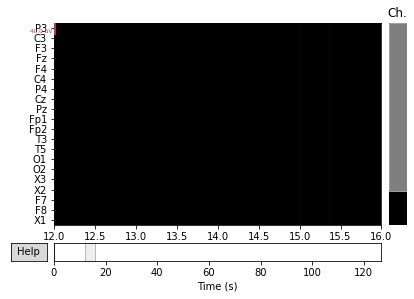

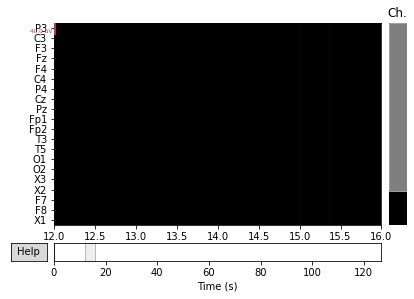

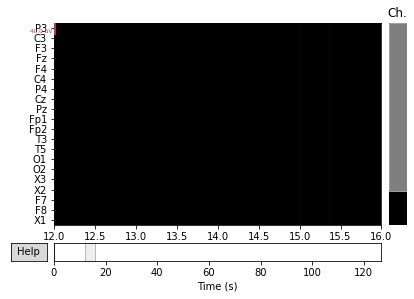

In [10]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact remove

orig_raw.plot(start=12, duration=4)
raw.plot(start=12, duration=4)

In [24]:
baseline_sam = pd.read_pickle('./sam-AlphaTheta/offline/20200304-144100-raw.pcl')
baseline2_sam = pd.read_pickle('./sam-AlphaTheta/offline/20200304-144601-raw.pcl')

In [4]:
signals = baseline_sam['signals']

In [22]:
def plot_signals(data, channels):
    fig, axs = plt.subplots(nrows=data.shape[1], figsize=(40, 1.4 * data.shape[1]))
    for channel in range(data.shape[1]):
        sns.lineplot(data=data[:, channel], ax=axs[channel])
        axs[channel].set_ylabel(channels[channel])
        
    return fig

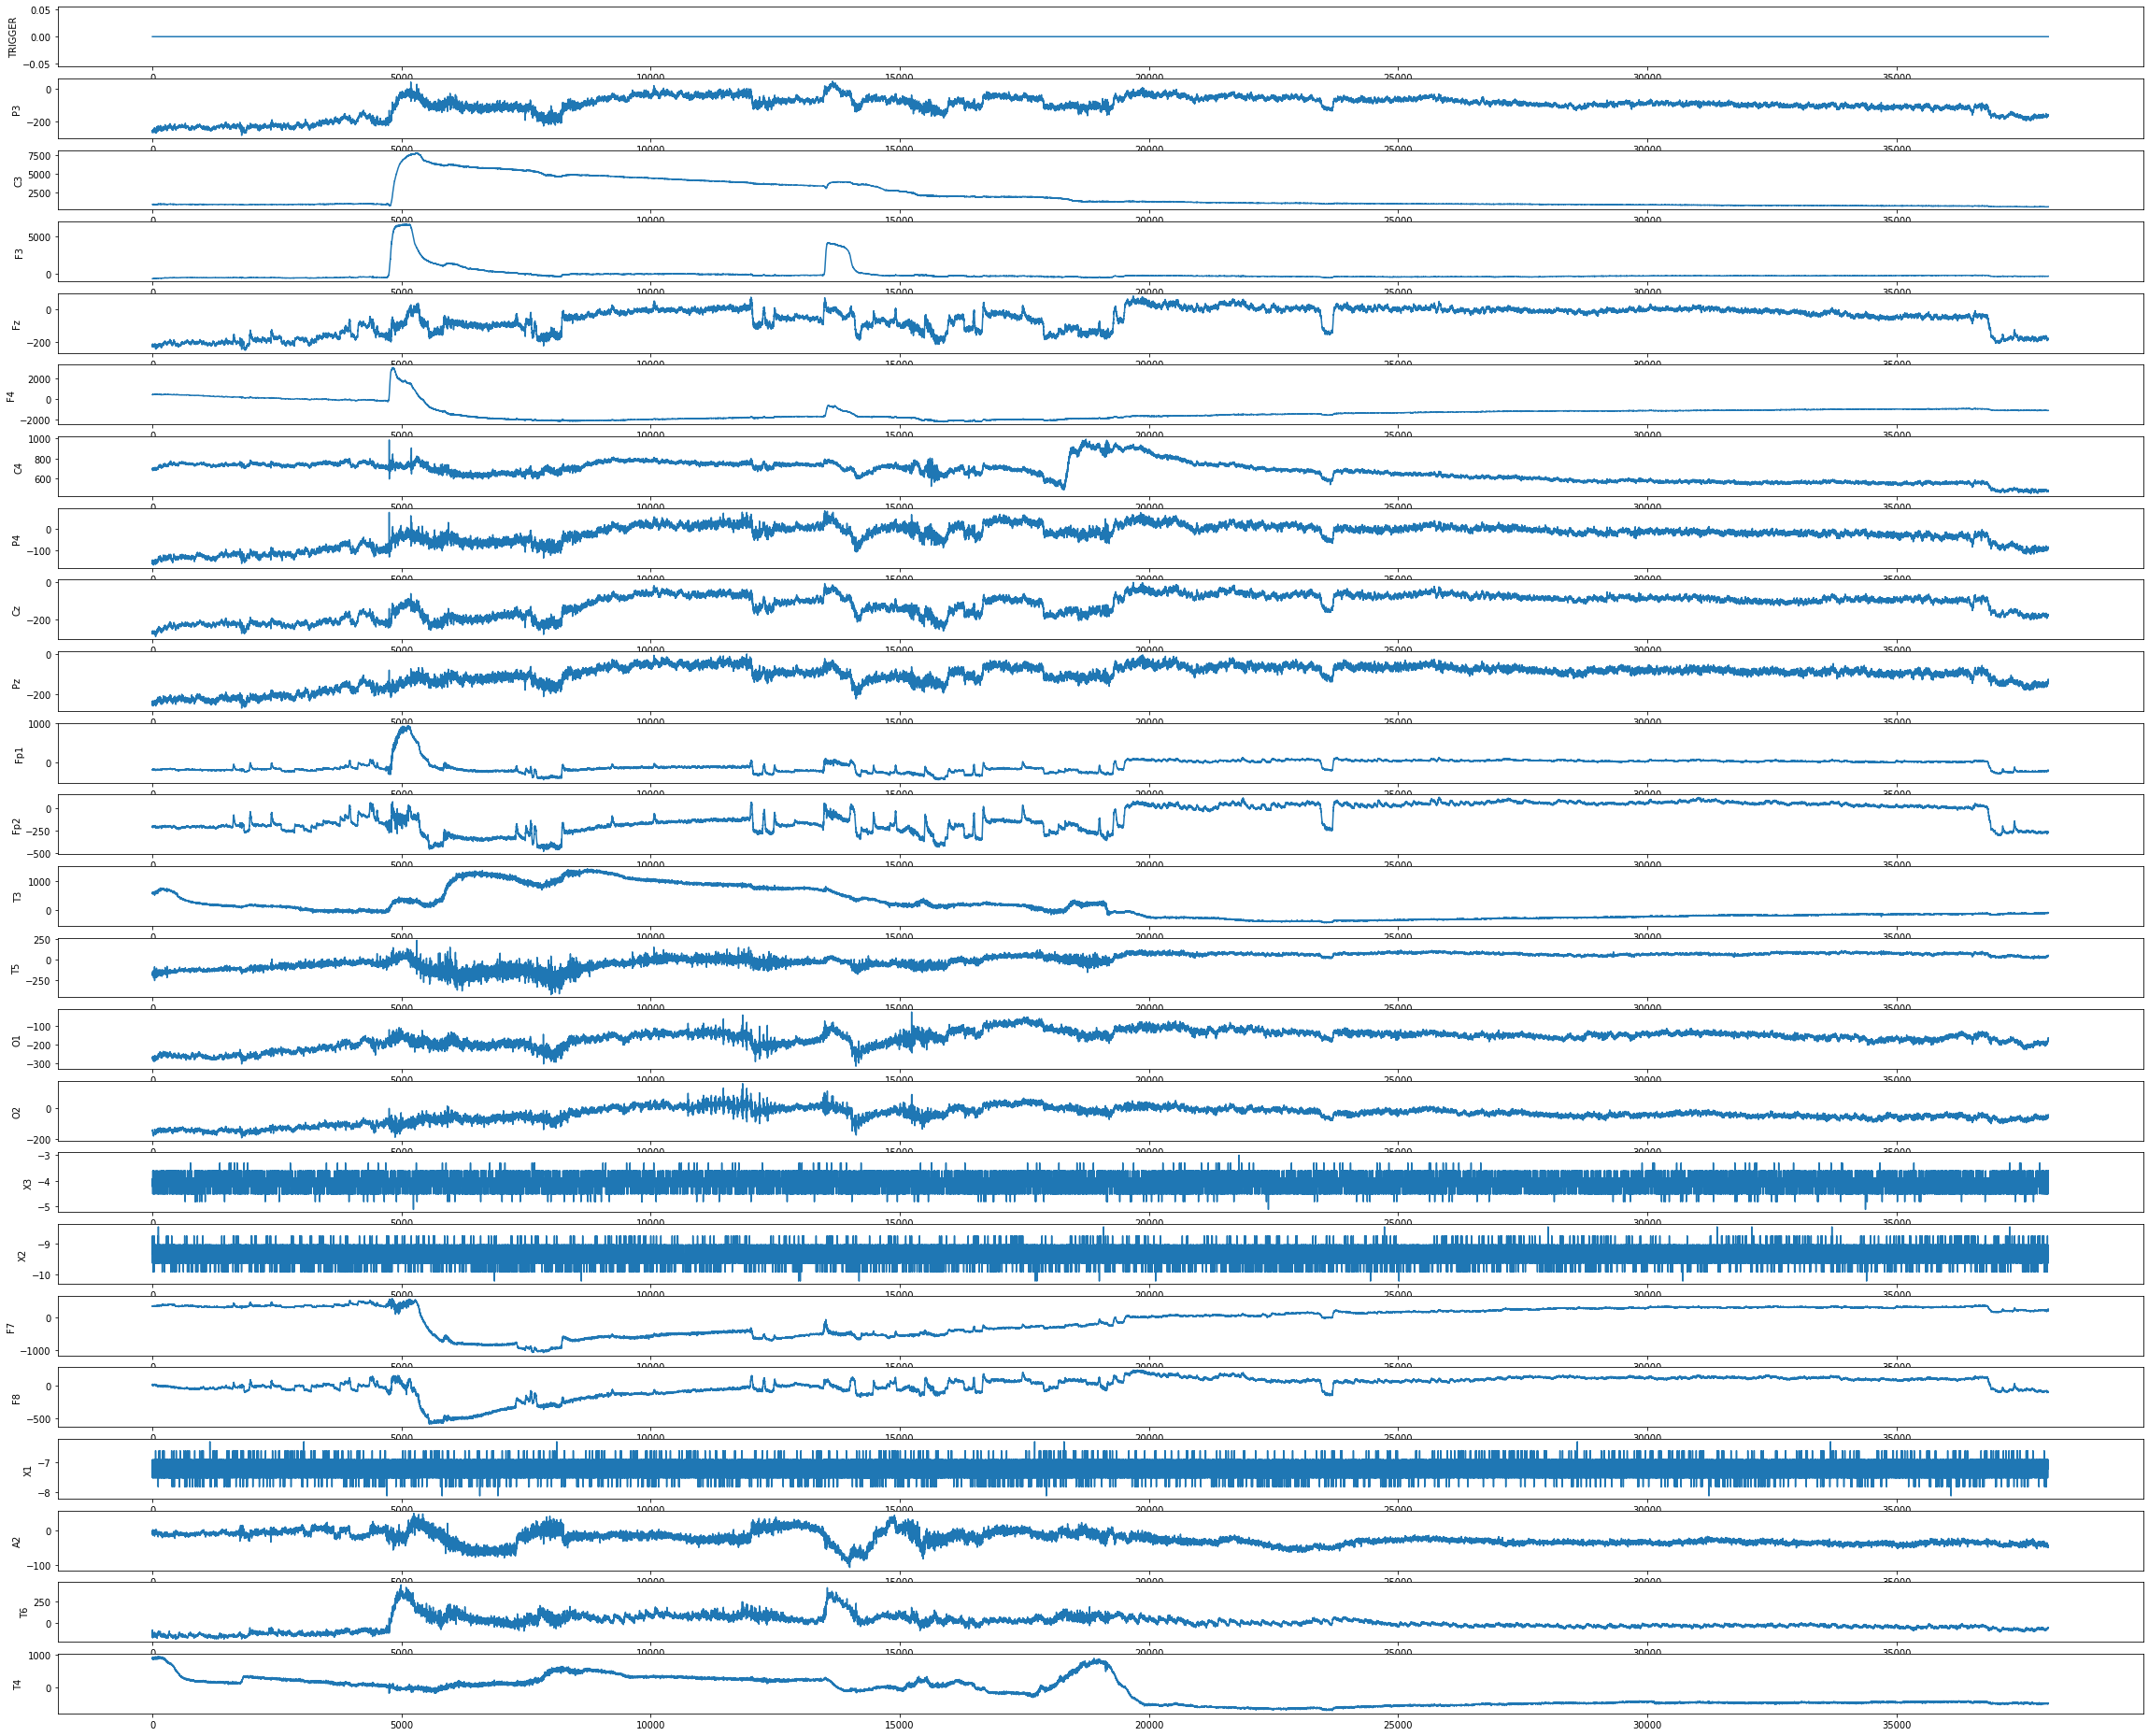

In [25]:
baseline_fig = plot_signals(baseline_sam['signals'], baseline_sam['ch_names'])

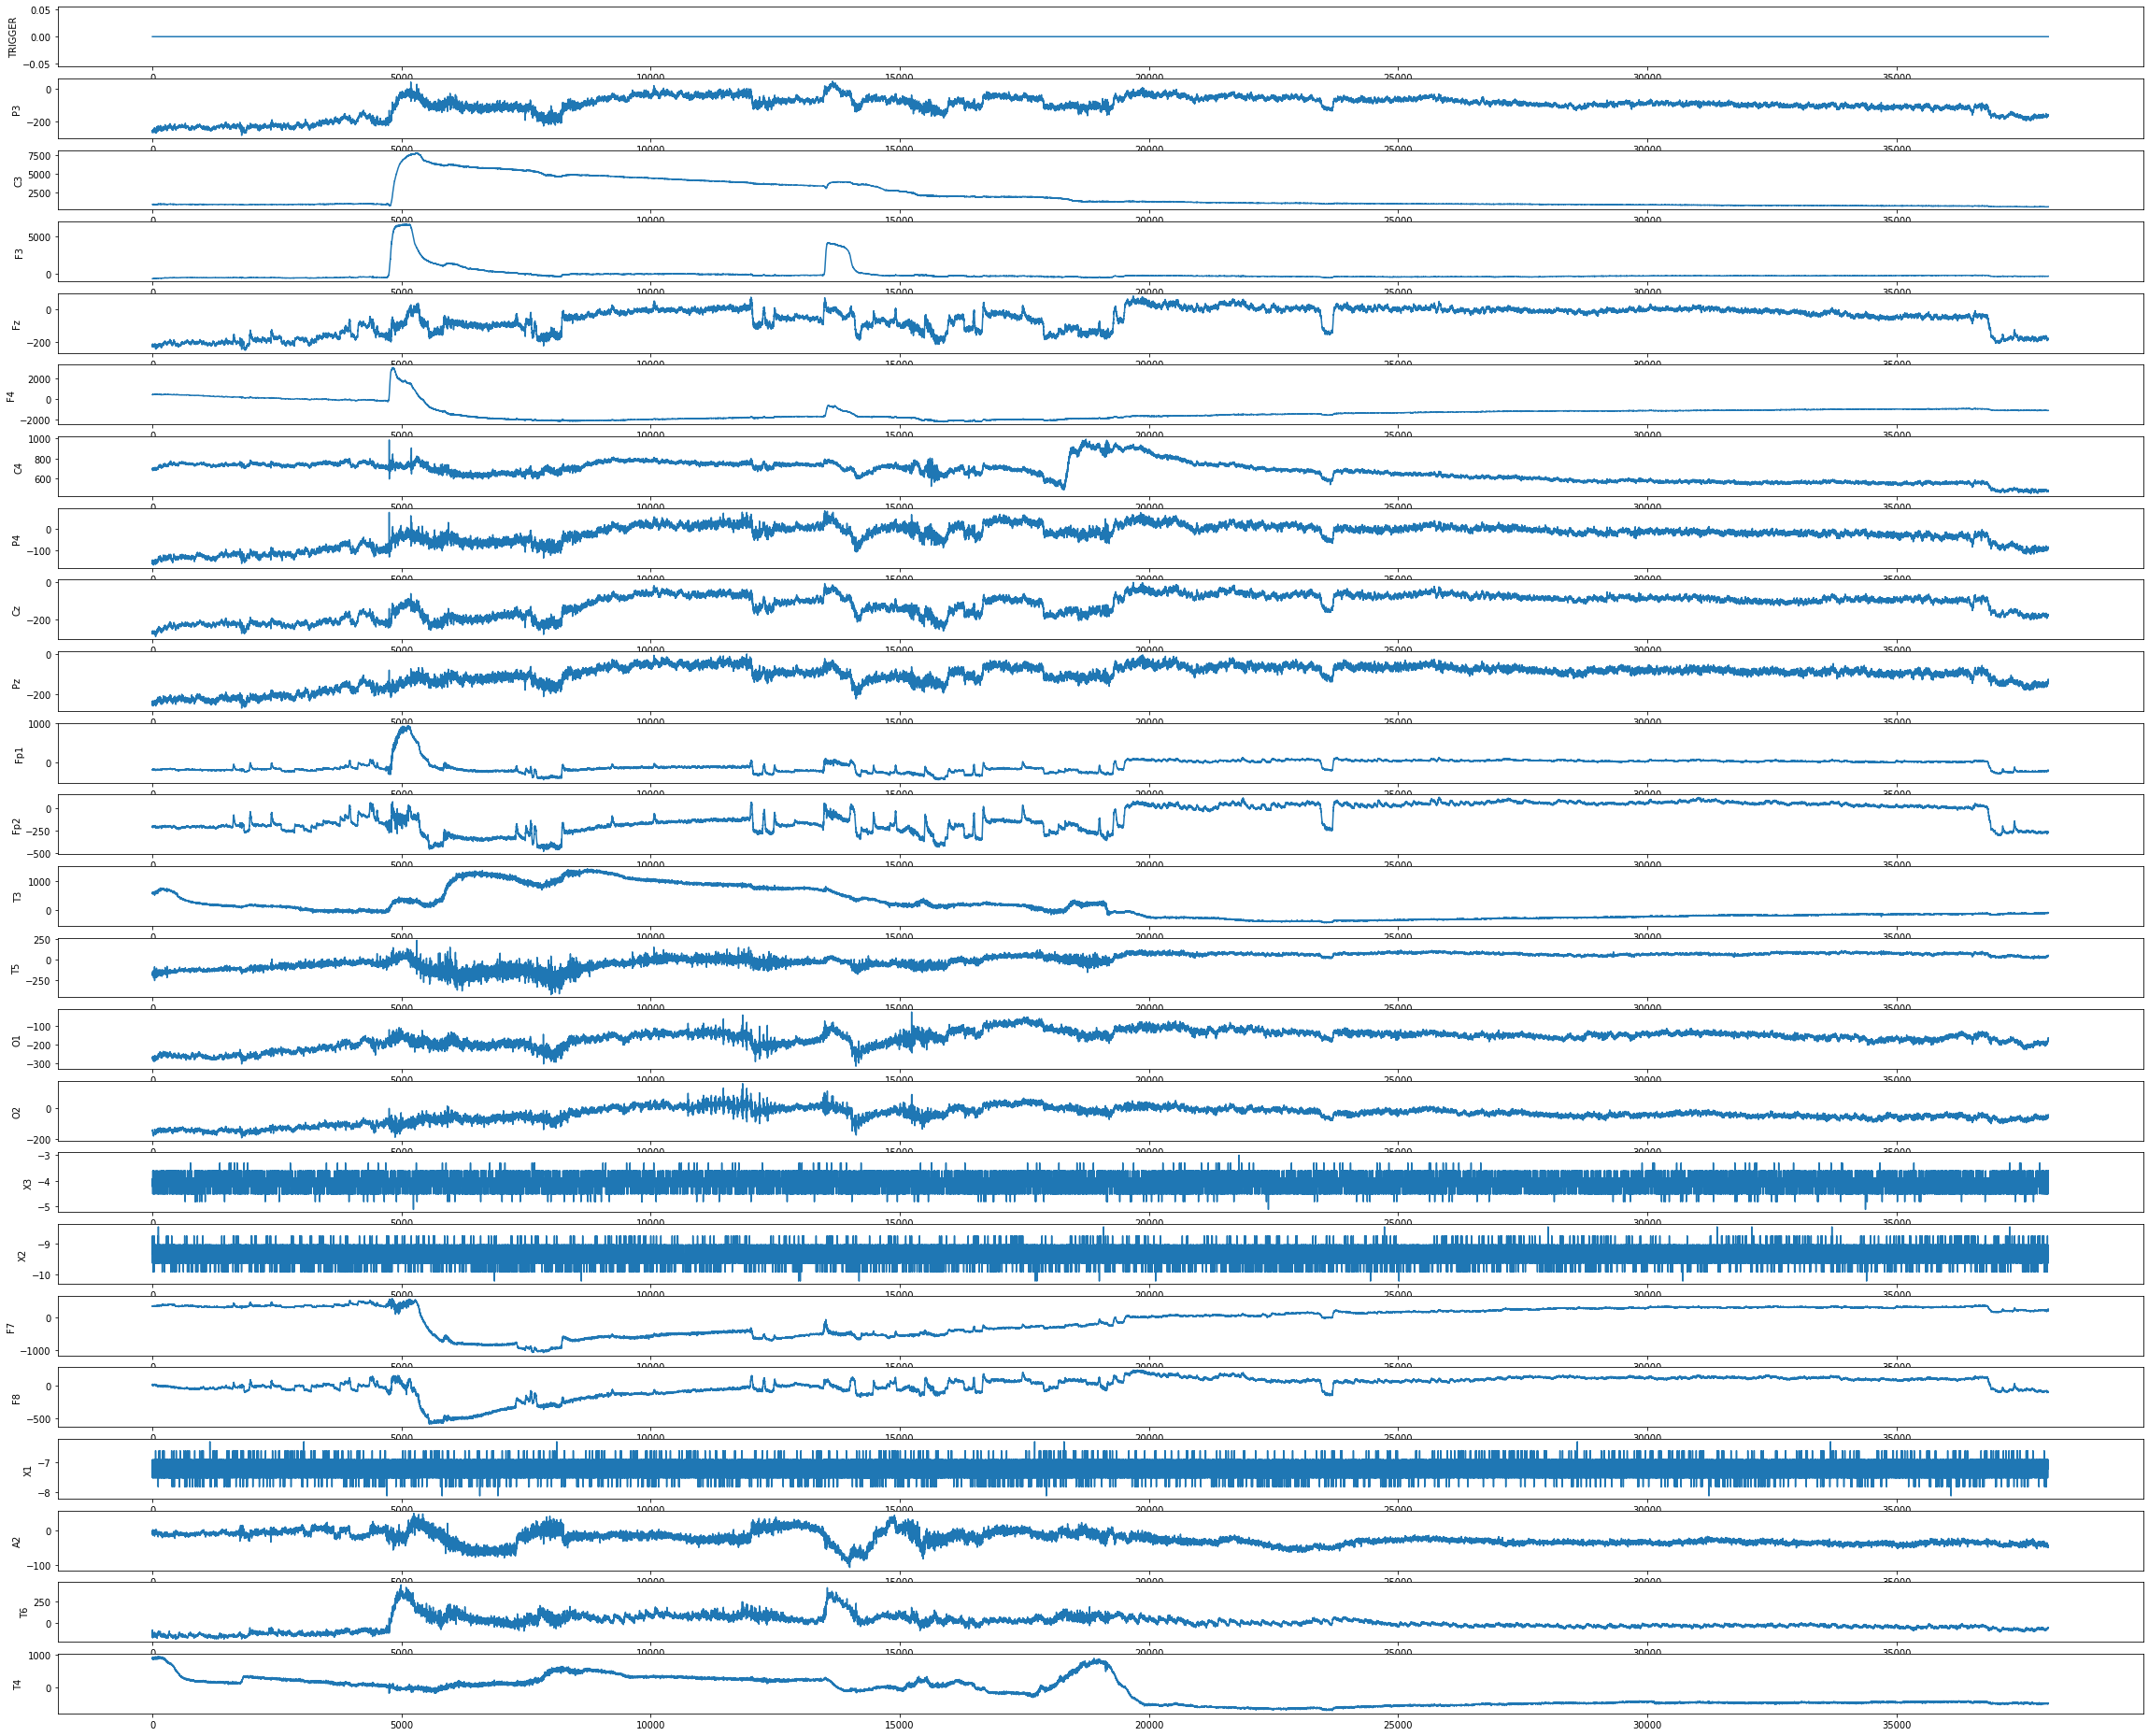

In [21]:
fig, axs = plt.subplots(nrows=signals.shape[1], figsize=(40, 1.4 * signals.shape[1]))
for channel in range(signals.shape[1]):
    sns.lineplot(data=signals[:, channel], ax=axs[channel])
    axs[channel].set_ylabel(baseline_sam['ch_names'][channel])